<h1>Test discretisation</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [10]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import display, HTML

In [3]:
from discretisation.preprocessing import FileLoader
from models import HyperPars as AlignmentHyperPars
from discretisation.adduct_cluster import AdductCluster, Peak
from shared_bin_matching import SharedBinMatching as Aligner
from ground_truth import GroundTruth

Define input parameters

In [4]:
input_dir = '/home/joewandy/git/metabolomics_tools/alignment/input/M1_4'
database_file = None
transformation_file = '/home/joewandy/git/metabolomics_tools/discretisation/mulsubs/pos_transformations.yml'

In [5]:
hp = AlignmentHyperPars()    
hp.within_file_mass_tol = 60
hp.within_file_rt_tol = 5
hp.across_file_mass_tol = 100
hp.across_file_rt_tol = 100
hp.alpha_mass = 1.0
hp.dp_alpha = 100.0
hp.t = 0
hp.mass_clustering_n_iterations = 100
hp.rt_clustering_nsamps = 200
hp.rt_clustering_burnin = 100

print hp

Hyperparameters across_file_mass_tol=100, across_file_rt_tol=100, alpha_mass=1.0, beta=0.1, dp_alpha=100.0, mass_clustering_n_iterations=100, rt_clustering_burnin=100, rt_clustering_nsamps=200, t=0, within_file_mass_tol=60, within_file_rt_tol=5


In [6]:
loader = FileLoader()
data_list = loader.load_model_input(input_dir, database_file, 0, 0, make_bins=False)

5842 features read from M1_1.txt
7515 features read from M1_2.txt
9132 features read from M1_3.txt
5876 features read from M1_4.txt


In [7]:
peak_list = []
for peak_data in data_list:
    peak_list.extend(peak_data.features)
print len(peak_list)

28365


In [9]:
ac = AdductCluster(mass_tol=hp.within_file_mass_tol, rt_tol=hp.within_file_rt_tol, 
                   alpha=hp.alpha_mass, mh_biggest=True, transformation_file=transformation_file, verbose=2)

ac.init_from_list_2(peak_list)

 [M+ACN+H, M+ACN+H [C13], [M-CO]+ACN+H, [M-CO]+ACN+H [C13], [M-H2O]+ACN+H, [M-H2O]+ACN+H [C13], [M-CH2O2]+ACN+H, [M-CH2O2]+ACN+H [C13], [M-CO2]+ACN+H, [M-CO2]+ACN+H [C13], M+NH4, M+NH4 [C13], [M-CO]+NH4, [M-CO]+NH4 [C13], [M-H2O]+NH4, [M-H2O]+NH4 [C13], [M-CH2O2]+NH4, [M-CH2O2]+NH4 [C13], [M-CO2]+NH4, [M-CO2]+NH4 [C13], M+Na, M+Na [C13], [M-CO]+Na, [M-CO]+Na [C13], [M-H2O]+Na, [M-H2O]+Na [C13], [M-CH2O2]+Na, [M-CH2O2]+Na [C13], [M-CO2]+Na, [M-CO2]+Na [C13], M+K, M+K [C13], [M-CO]+K, [M-CO]+K [C13], [M-H2O]+K, [M-H2O]+K [C13], [M-CH2O2]+K, [M-CH2O2]+K [C13], [M-CO2]+K, [M-CO2]+K [C13], M+2H, M+2H [C13], [M-CO]+2H, [M-CO]+2H [C13], [M-H2O]+2H, [M-H2O]+2H [C13], [M-CH2O2]+2H, [M-CH2O2]+2H [C13], [M-CO2]+2H, [M-CO2]+2H [C13], M+H, M+H [C13], [M-CO]+H, [M-CO]+H [C13], [M-H2O]+H, [M-H2O]+H [C13], [M-CH2O2]+H, [M-CH2O2]+H [C13], [M-CO2]+H, [M-CO2]+H [C13]]
processing .............................
Created 859 clusters
Assigning possible transformations 0/28365
Assigning possible transformation

In [11]:
ac.init_vb()
for n in range(hp.mass_clustering_n_iterations):
    print "VB step %d" % n
    sys.stdout.flush()
    ac.vb_step()

VB step 0
VB step 1
VB step 2
VB step 3
VB step 4
VB step 5
VB step 6
VB step 7
VB step 8
VB step 9
VB step 10
VB step 11
VB step 12
VB step 13
VB step 14
VB step 15
VB step 16
VB step 17
VB step 18
VB step 19
VB step 20
VB step 21
VB step 22
VB step 23
VB step 24
VB step 25
VB step 26
VB step 27
VB step 28
VB step 29
VB step 30
VB step 31
VB step 32
VB step 33
VB step 34
VB step 35
VB step 36
VB step 37
VB step 38
VB step 39
VB step 40
VB step 41
VB step 42
VB step 43
VB step 44
VB step 45
VB step 46
VB step 47
VB step 48
VB step 49
VB step 50
VB step 51
VB step 52
VB step 53
VB step 54
VB step 55
VB step 56
VB step 57
VB step 58
VB step 59
VB step 60
VB step 61
VB step 62
VB step 63
VB step 64
VB step 65
VB step 66
VB step 67
VB step 68
VB step 69
VB step 70
VB step 71
VB step 72
VB step 73
VB step 74
VB step 75
VB step 76
VB step 77
VB step 78
VB step 79
VB step 80
VB step 81
VB step 82
VB step 83
VB step 84
VB step 85
VB step 86
VB step 87
VB step 88
VB step 89
VB step 90
VB step 9

In [16]:
ac.map_assign()

In [17]:
def plot_biggest(ac, threshold):

    clusters_list = ac.clusters
    singleton_count = 0

    big_clusters = []
    biggest = clusters_list[0]
    for cluster in clusters_list:
        if cluster.N == 1:
            singleton_count += 1
        if cluster.N >= threshold:
            big_clusters.append(cluster)
            if cluster.N >= biggest.N:
                biggest = cluster

    print "Singleton count {}".format(singleton_count)
    print "{} big clusters found".format(len(big_clusters))
    print "Biggest has {} members".format(biggest.N)

    for c in big_clusters:
        ac.cluster_plot(c)

Singleton count 81
3 big clusters found
Biggest has 544 members
ERROR! Session/line number was not unique in database. History logging moved to new session 570
CLUSTER 9
Peak: 277.172144,1 -> M+H,276.164867548 (p=1.0)
Peak: 270.126764,1 -> M+H,269.119487548 (p=nan)
Peak: 277.177755,1 -> M+H,276.170478548 (p=nan)
Peak: 277.177532,1 -> M+H,276.170255548 (p=nan)
Peak: 277.178749,1 -> M+H,276.171472548 (p=nan)
Peak: 270.126967,1 -> M+H,269.119690548 (p=nan)
Peak: 278.179422,1 -> M+H,277.172145548 (p=nan)
Peak: 300.156516,1 -> M+H,299.149239548 (p=nan)
Peak: 270.127356,1 -> M+H,269.120079548 (p=nan)
Peak: 270.127982,1 -> M+H,269.120705548 (p=nan)
Peak: 270.127999,1 -> M+H,269.120722548 (p=nan)
Peak: 277.181576,1 -> M+H,276.174299548 (p=nan)
Peak: 319.197648,1 -> M+H,318.190371548 (p=nan)
Peak: 253.153497,1 -> M+H,252.146220548 (p=nan)
Peak: 130.089654,1 -> M+H,129.082377548 (p=nan)
Peak: 277.155671,1 -> M+H,276.148394548 (p=nan)
Peak: 250.186288,1 -> M+H,249.179011548 (p=nan)
Peak: 300.1563

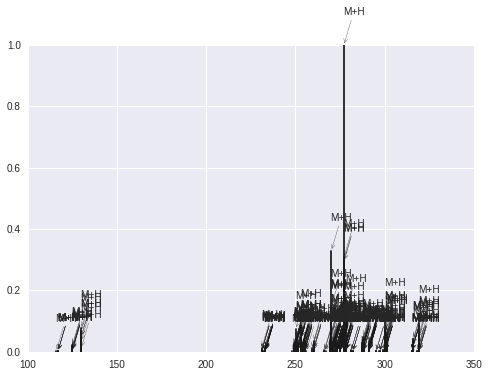

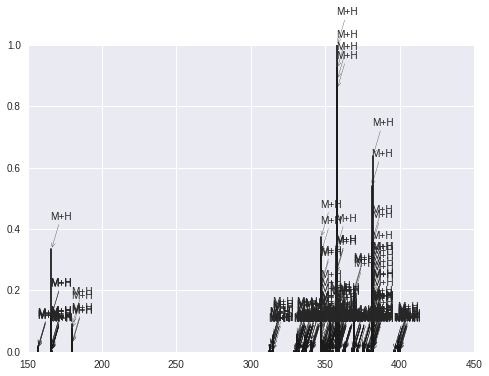

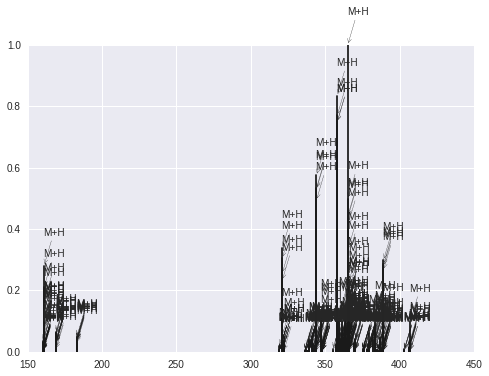

In [18]:
plot_biggest(ac, 500)